<a href="https://colab.research.google.com/github/Pakostipup/ML_labs/blob/main/%D0%9B%D0%B0%D0%B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install pandas scikit-learn seaborn scipy

In [28]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

In [29]:

   # Загрузка набора данных
   df = pd.read_csv('/content/heart.csv')

In [30]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [31]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


In [33]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [34]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'SBP_50'] = np.nan

In [35]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       5
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [36]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.SBP_50 = df_median.SBP_50.fillna(df_median.SBP_50.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [39]:
X = df.drop('DEATH', axis=1)

In [41]:
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0


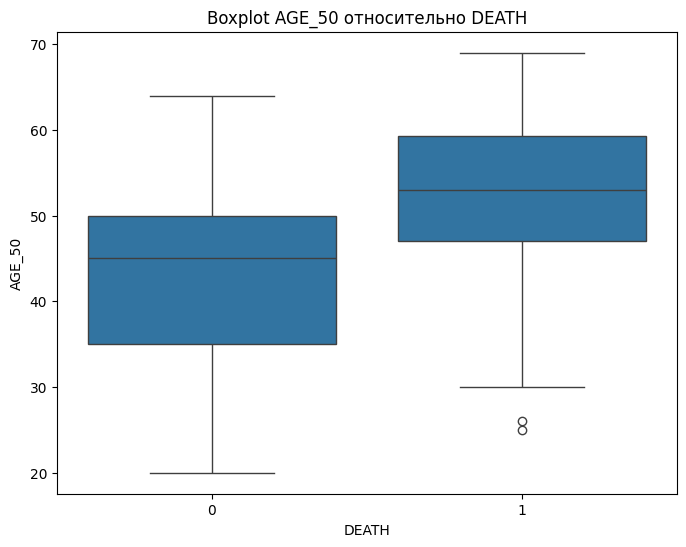

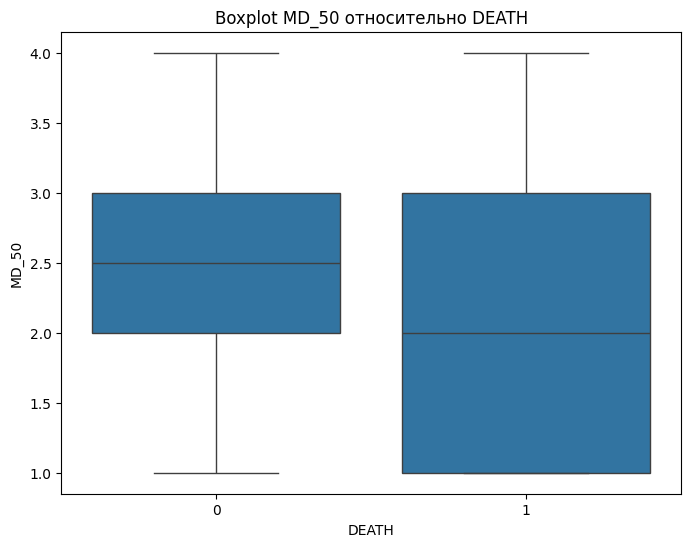

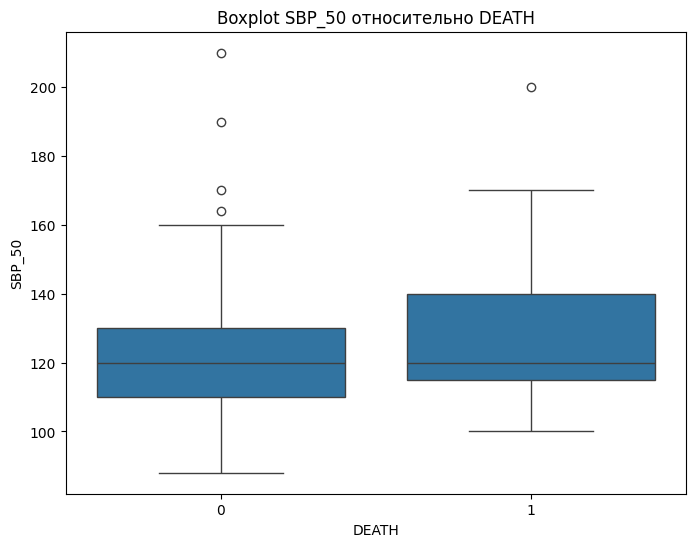

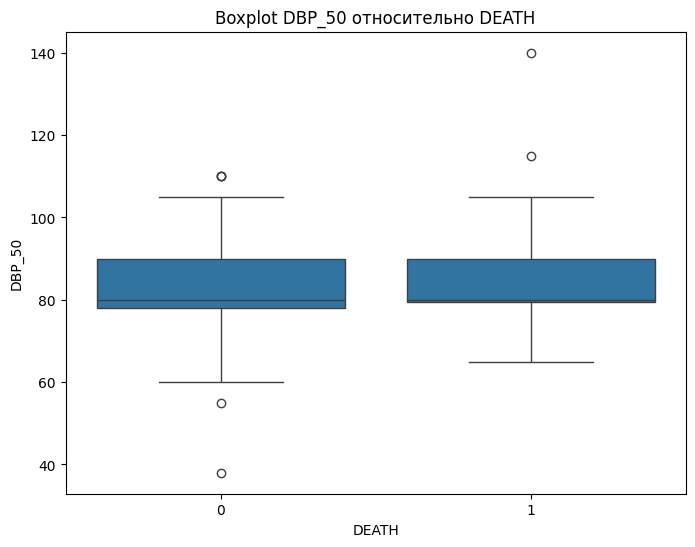

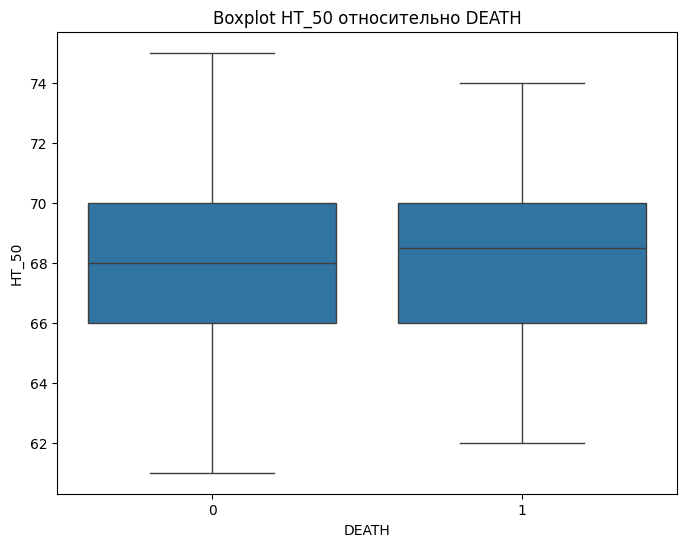

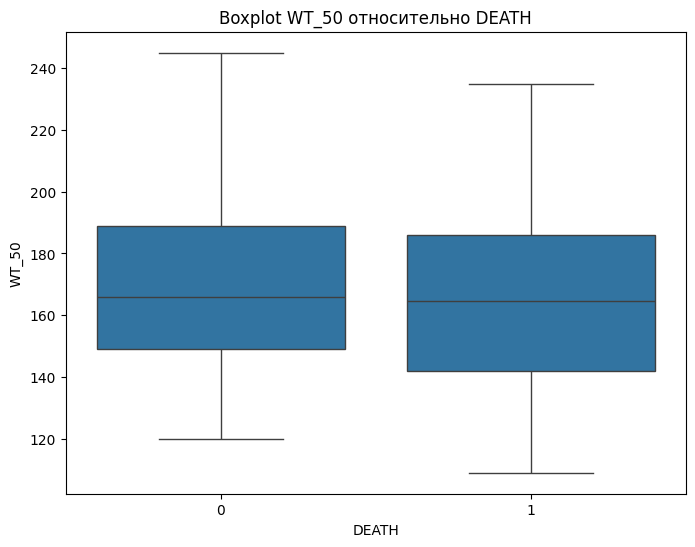

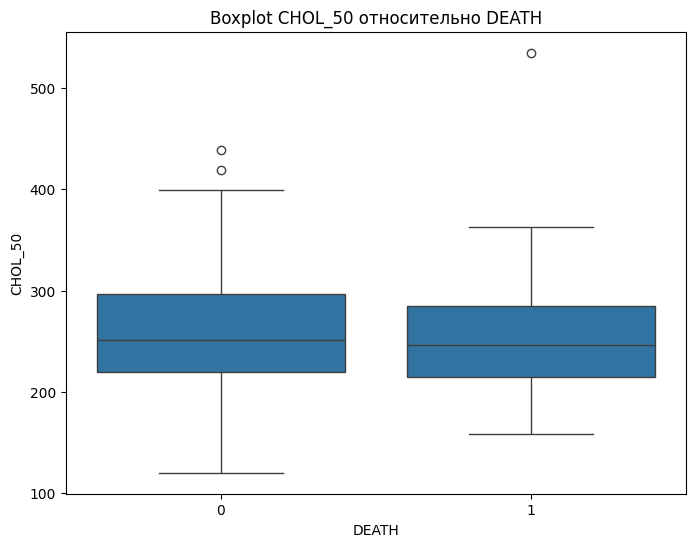

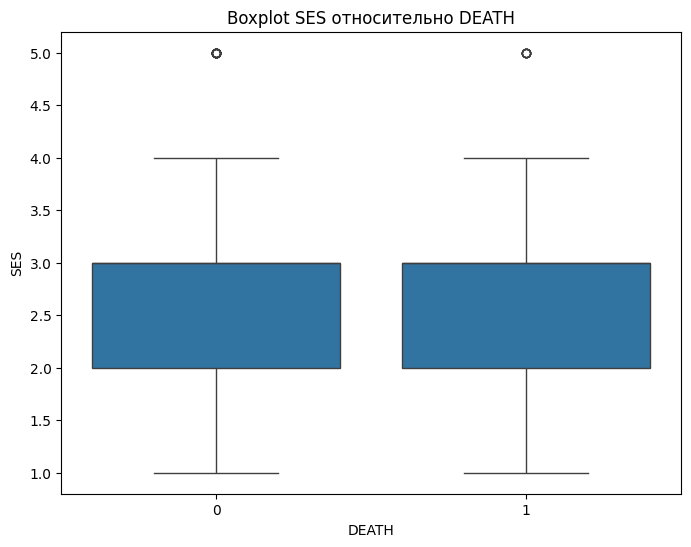

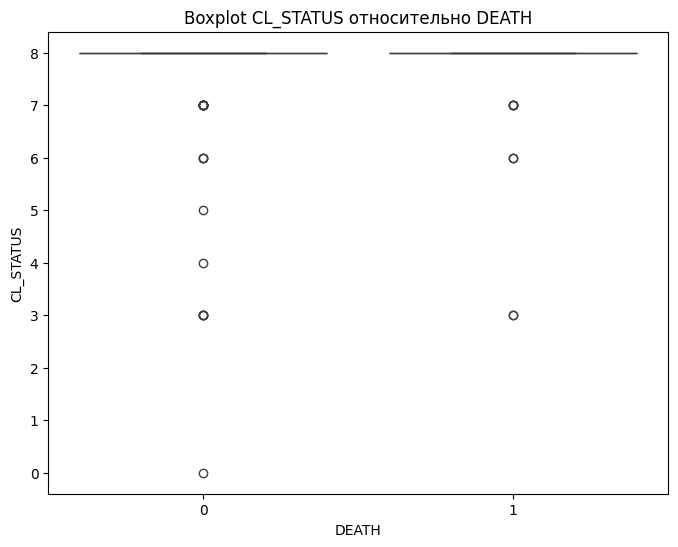

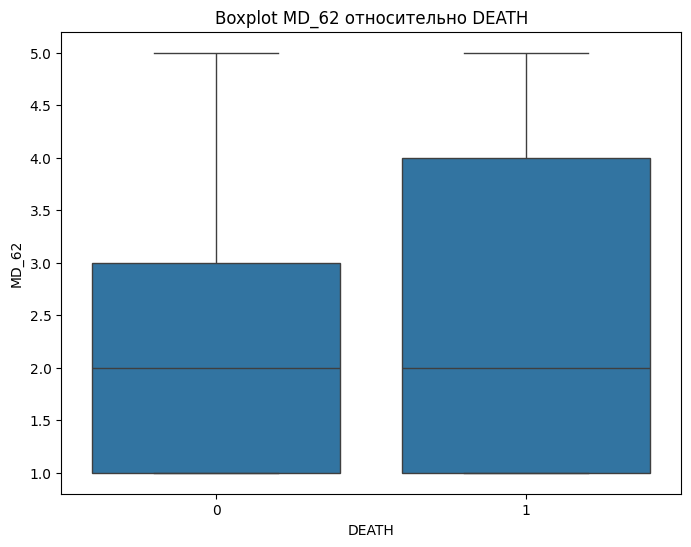

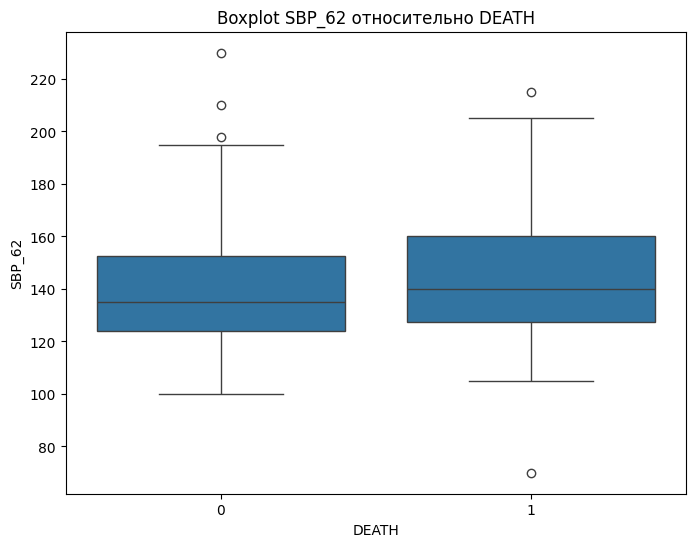

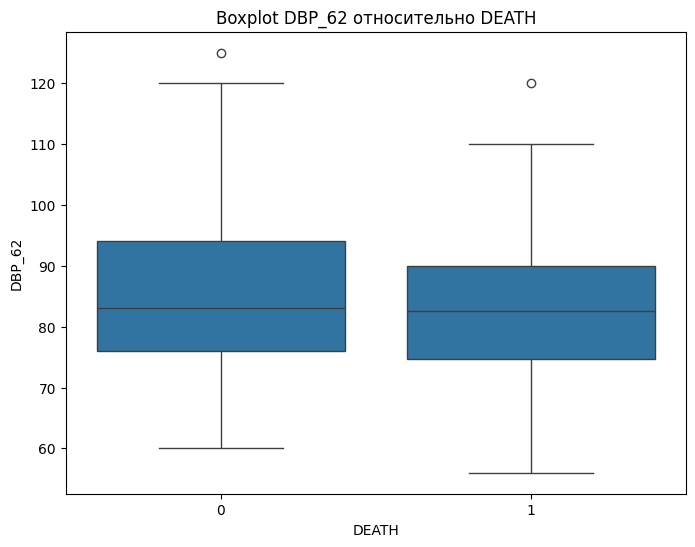

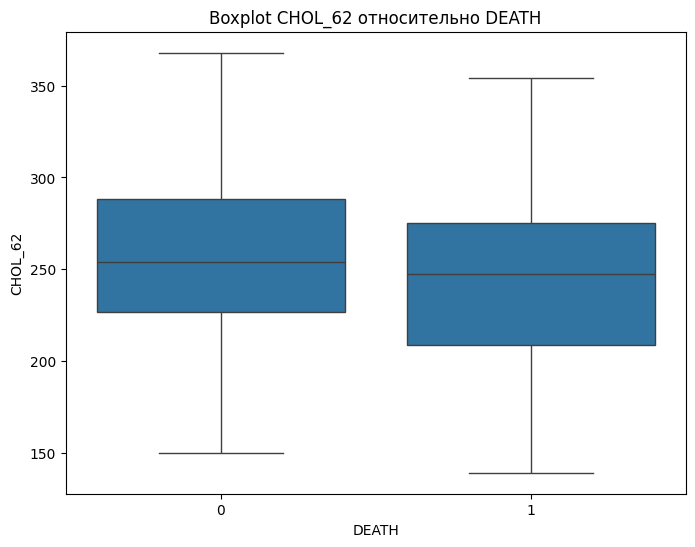

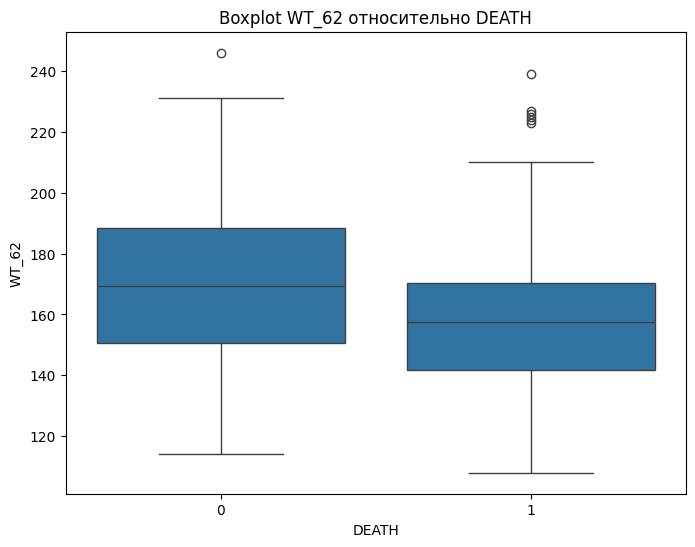

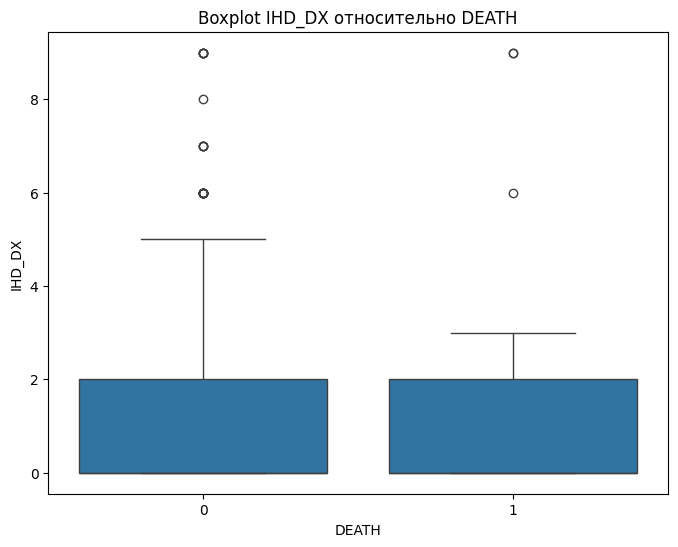

In [42]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='DEATH', y=col, data=df)
    plt.title(f'Boxplot {col} относительно DEATH')
    plt.show()

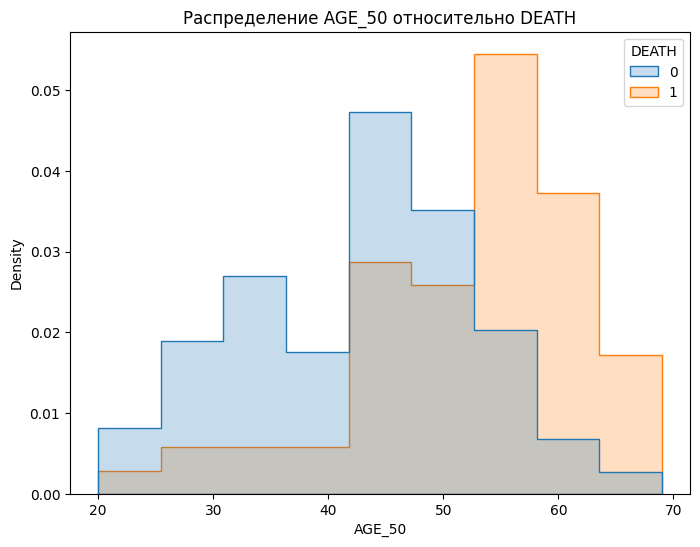

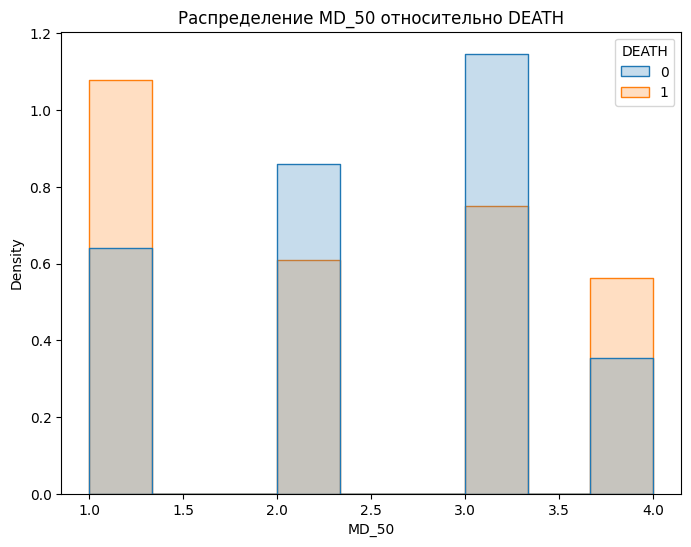

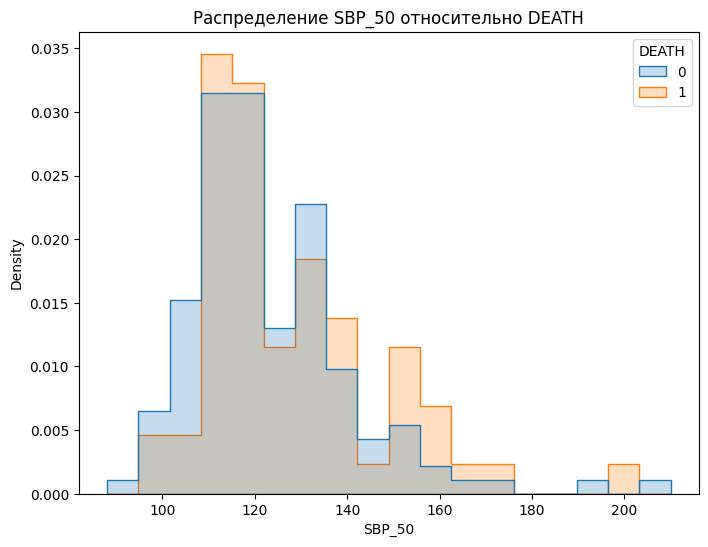

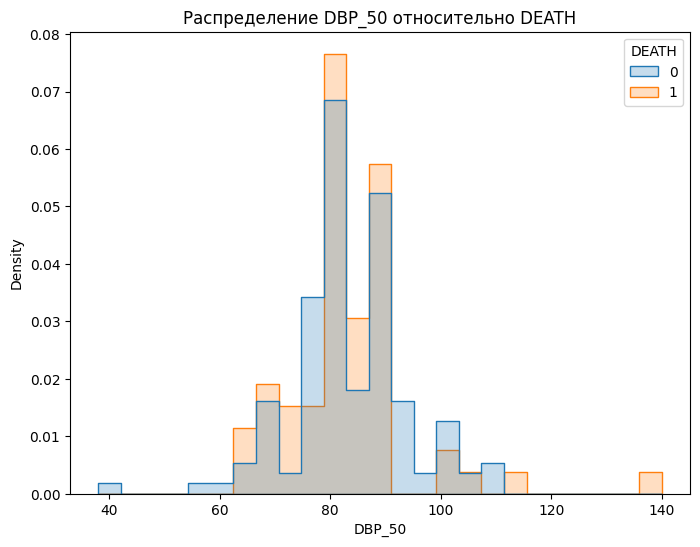

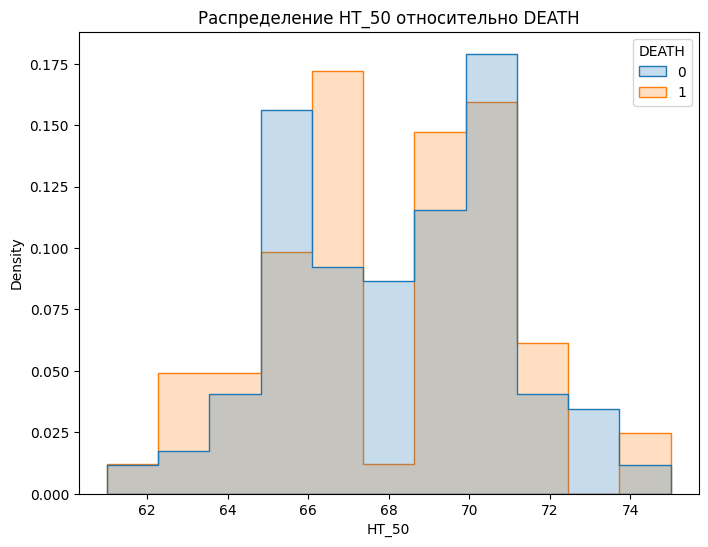

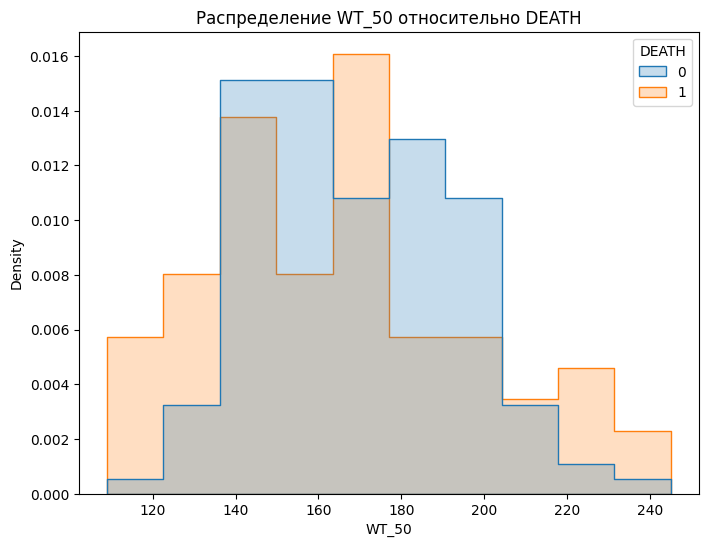

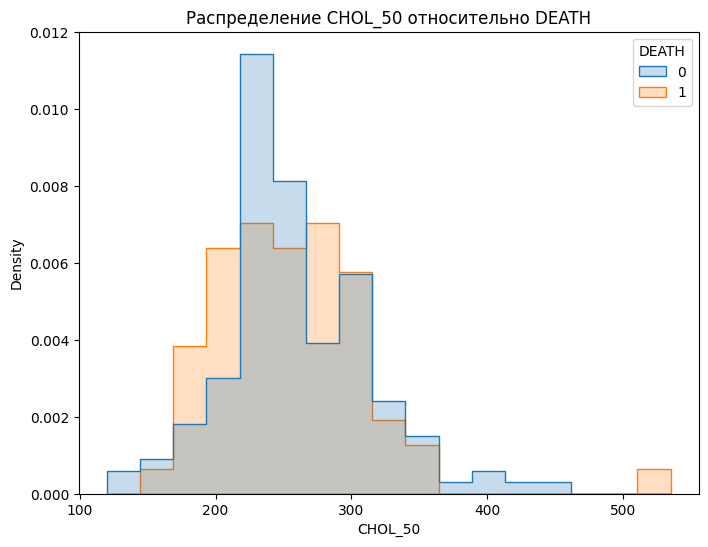

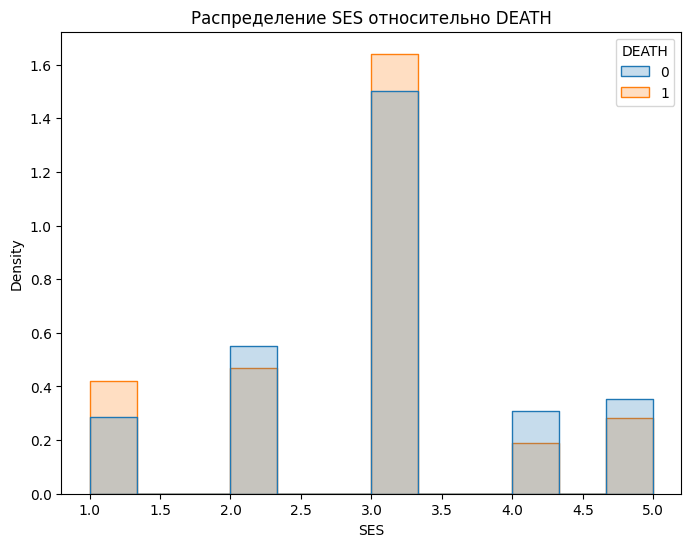

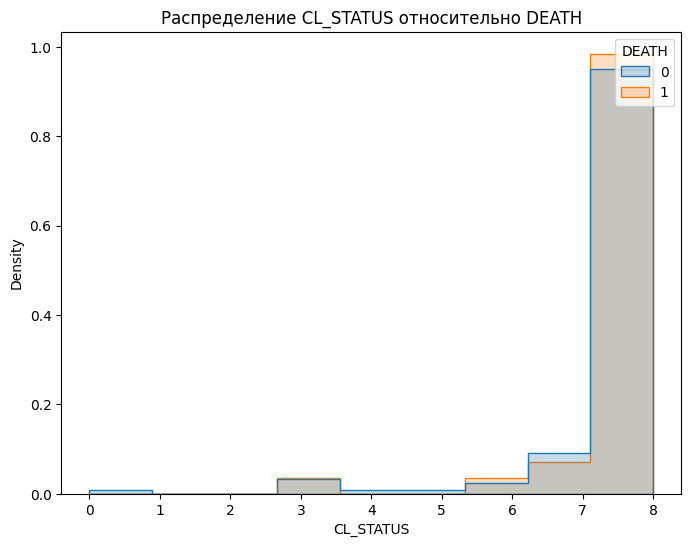

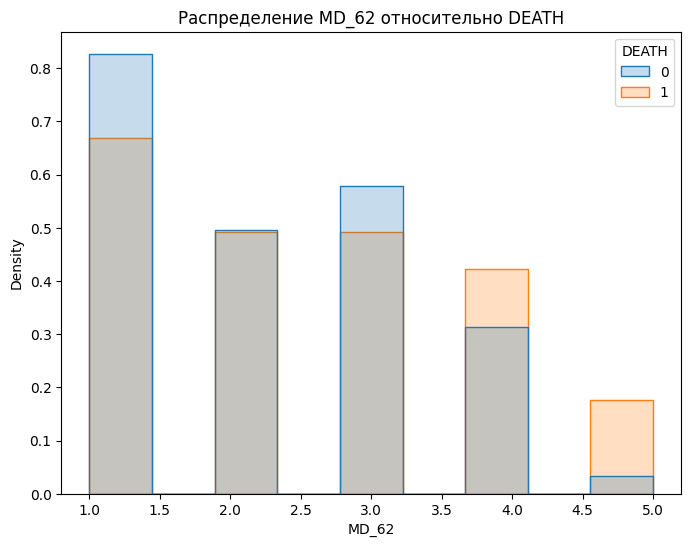

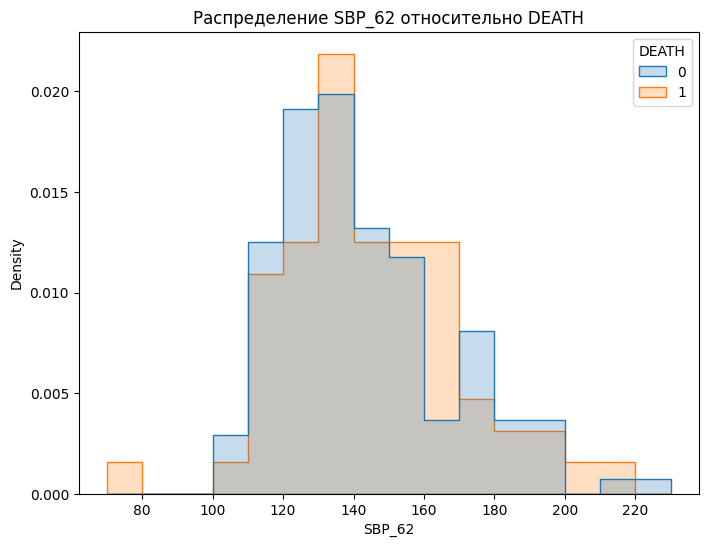

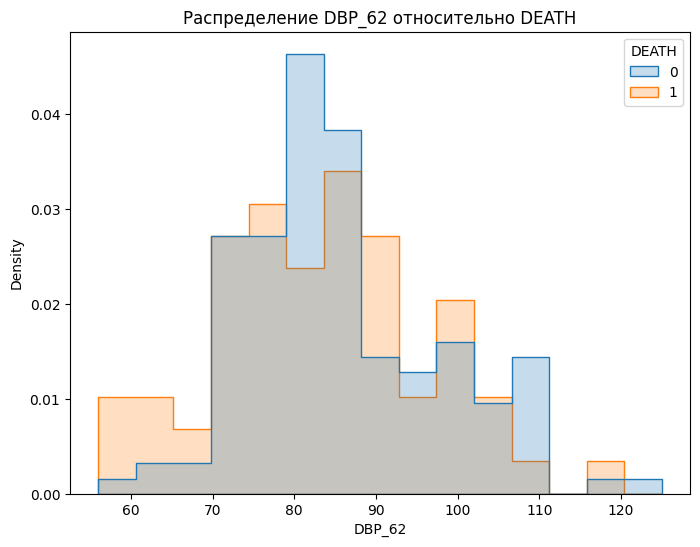

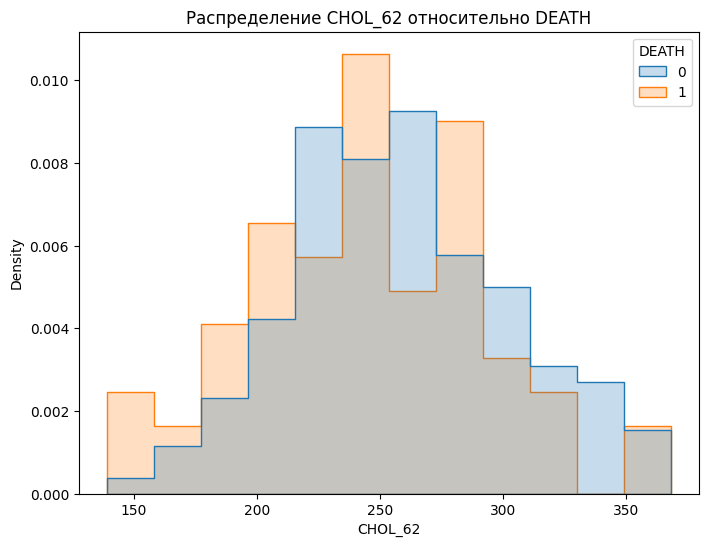

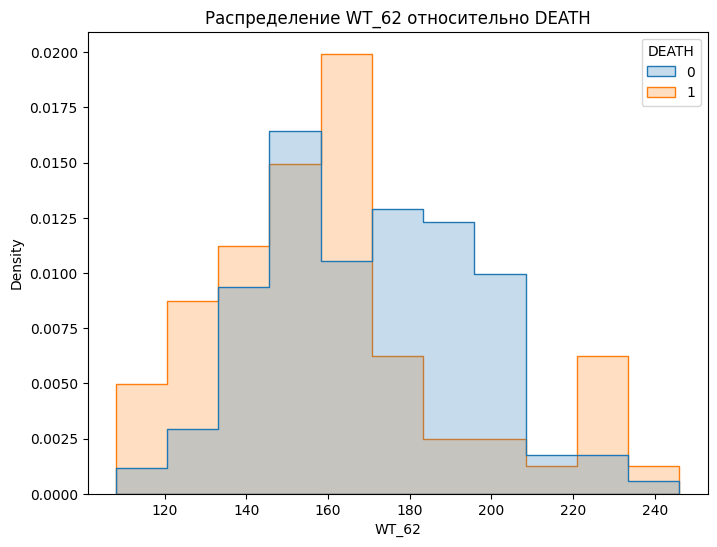

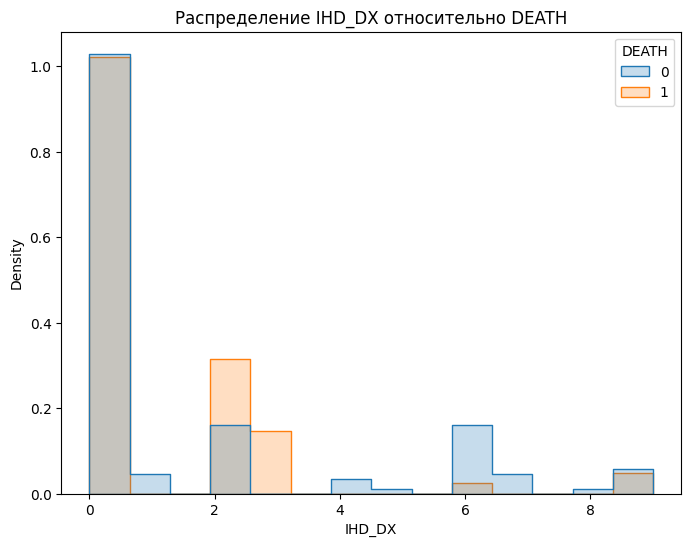

In [43]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='DEATH', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно DEATH')
    plt.show()

⏰ Что по ящикам с усами, что по распредению мы видим в основном незначительные различия для счастливых и несчатсливых сотрудников. Однако по показателям AGE_50, MD_50, DBP_50, SBP_62 есть значительные различия в медиане, количестве выбросов и квартильного размаха, а также по плотности распределения признака average_montly_hours можно судить о зависимости этих признаков. Более точные выводы сделаем после анализа результатов описательной статистики.

In [46]:
categorical_cols = ['DEATH']
df[categorical_cols] = df[categorical_cols].astype('object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AGE_50     200 non-null    int64 
 1   MD_50      200 non-null    int64 
 2   SBP_50     200 non-null    int64 
 3   DBP_50     200 non-null    int64 
 4   HT_50      200 non-null    int64 
 5   WT_50      200 non-null    int64 
 6   CHOL_50    200 non-null    int64 
 7   SES        200 non-null    int64 
 8   CL_STATUS  200 non-null    int64 
 9   MD_62      200 non-null    int64 
 10  SBP_62     200 non-null    int64 
 11  DBP_62     200 non-null    int64 
 12  CHOL_62    200 non-null    int64 
 13  WT_62      200 non-null    int64 
 14  IHD_DX     200 non-null    int64 
 15  DEATH      200 non-null    object
dtypes: int64(15), object(1)
memory usage: 25.1+ KB


In [48]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('DEATH')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('DEATH')[df.select_dtypes(include=['object']).columns].describe()

In [49]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('DEATH')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для AGE_50:

       count     mean       std   min   25%   50%    75%   max
DEATH                                                         
0      136.0  43.1250  9.967679  20.0  35.0  45.0  50.00  64.0
1       64.0  52.3125  9.904104  25.0  47.0  53.0  59.25  69.0


Описательная статистика для MD_50:

       count      mean       std  min  25%  50%  75%  max
DEATH                                                    
0      136.0  2.404412  0.953579  1.0  2.0  2.5  3.0  4.0
1       64.0  2.265625  1.144236  1.0  1.0  2.0  3.0  4.0


Описательная статистика для SBP_50:

       count        mean        std    min    25%    50%    75%    max
DEATH                                                                 
0      136.0  123.257353  17.557523   88.0  110.0  120.0  130.0  210.0
1       64.0  127.765625  19.023580  100.0  115.0  120.0  140.0  200.0


Описательная статистика для DBP_50:

       count       mean        std   min   25%   50%   75%    max
DEATH        

In [50]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


DEATH                
      count unique top freq
DEATH                      
0       136      1   0  136
1        64      1   1   64

1. AGE_50:

  Средний возраст людей, которые не умерли (DEATH = 0), составляет 43.13 года, что значительно ниже, чем у умерших (DEATH = 1), где среднее значение равно 52.31 года.
Разброс (std) в обеих группах схожий (9.97 и 9.90), что указывает на одинаковую вариативность возрастов.
Минимальный возраст составляет 20 лет для DEATH = 0 и 25 лет для DEATH = 1. Максимальные значения — 64 и 69 лет соответственно.

2. MD_50:

  Средний показатель MD_50 ниже у умерших (2.27) по сравнению с выжившими (2.40).
Стандартное отклонение у умерших выше (1.14 против 0.95), что говорит о большей вариативности этого показателя в этой группе.

3. SBP_50:

  Среднее значение систолического давления (SBP_50) выше у умерших (127.77 мм рт. ст.) по сравнению с выжившими (123.26 мм рт. ст.).
Разброс показателей давления схожий (19.02 против 17.56), а максимальные значения близки (210 и 200 мм рт. ст.).

4. DBP_50:

  Средние показатели диастолического давления почти идентичны: 83.43 мм рт. ст. для выживших и 83.28 мм рт. ст. для умерших.
Разброс значений немного выше у умерших (11.77 против 10.66), а максимальные значения составляют 110 и 140 мм рт. ст. соответственно.

5. HT_50:

  Средний рост у выживших (68.24 дюйма) чуть выше, чем у умерших (67.98 дюйма).
Разброс значений схожий (2.73 и 2.86).

6. WT_50:

  Средний вес у выживших выше (169.24 фунта), чем у умерших (165.59 фунта).
Стандартное отклонение у умерших выше (31.54 против 24.03), что говорит о большей вариативности веса.

7. CHOL_50:

  Средний уровень холестерина у выживших составляет 259.27 мг/дл, что немного выше, чем у умерших (255.63 мг/дл).
Разброс значений выше у умерших (58.19 против 54.41), а максимальные значения холестерина у умерших достигают 535 мг/дл.

8. SES:

  Средний показатель SES ниже у умерших (2.81) по сравнению с выжившими (2.96).
Разброс значений в обеих группах схожий (~1.07).

9. CL_STATUS:

  Средние значения показателя CL_STATUS очень близки (7.72 у умерших и 7.62 у выживших).
Стандартное отклонение меньше у умерших (0.95 против 1.19).

10. MD_62:

  У умерших среднее значение MD_62 выше (2.53), чем у выживших (2.21).
Разброс показателей также выше у умерших (1.31 против 1.13).

11. SBP_62:

  Среднее систолическое давление (SBP_62) выше у умерших (143.03 мм рт. ст.) по сравнению с выжившими (140.75 мм рт. ст.).
Разброс показателей у умерших также выше (25.57 против 24.28).

12. DBP_62:

  Средние показатели диастолического давления у умерших ниже (83.31 мм рт. ст.) по сравнению с выжившими (85.53 мм рт. ст.).
Стандартное отклонение схожее (13.14 против 12.63).

13. CHOL_62:

  Средний уровень холестерина у выживших выше (258.38 мг/дл) по сравнению с умершими (244.92 мг/дл).
Разброс у умерших выше (47.69 против 45.49).

14. WT_62:

  Средний вес у выживших выше (170.54 фунта) по сравнению с умершими (160.64 фунта).
Разброс веса у умерших выше (30.37 против 25.57).

15. IHD_DX:

  Средний показатель IHD_DX у выживших выше (1.57) по сравнению с умершими (1.06).
Разброс значений также выше у выживших (2.67 против 1.92).

  Выводы:

  Возраст является значимым фактором: умершие пациенты старше в среднем на 9 лет.
Систолическое давление (SBP_50 и SBP_62) выше у умерших, что может указывать на связь между гипертонией и смертностью.
Вес и уровень холестерина также ниже у умерших пациентов.
MD_62 и SES указывают на различия в социально-экономическом статусе и медико-диагностических показателях между группами.

In [52]:
df['DEATH'] = pd.to_numeric(df['DEATH'], errors='coerce')

In [55]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
AGE_50,1.000000,0.022067,0.311815,0.149431,-0.140032,-0.028314,0.069988,-0.141201,-0.034221,0.102846,0.291354,-0.074081,-0.149335,-0.184383,-0.028540,0.397356
MD_50,0.022067,1.000000,-0.001199,0.038443,-0.050876,-0.061801,-0.075200,0.042115,0.000882,-0.019306,-0.092437,-0.007341,0.052976,-0.029073,-0.085207,-0.063779
SBP_50,0.311815,-0.001199,1.000000,0.747623,-0.162285,0.101327,0.013411,-0.020001,-0.517543,-0.051933,0.485679,0.316481,-0.182626,-0.013504,0.049263,0.116385
DBP_50,0.149431,0.038443,0.747623,1.000000,-0.034516,0.258936,0.049413,-0.011338,-0.427714,-0.062561,0.420695,0.416171,-0.105450,0.145620,0.071156,-0.006174
HT_50,-0.140032,-0.050876,-0.162285,-0.034516,1.000000,0.440524,-0.095610,-0.054799,0.164069,0.015044,-0.038900,0.071399,-0.043998,0.513601,0.019802,-0.043632
WT_50,-0.028314,-0.061801,0.101327,0.258936,0.440524,1.000000,0.053567,0.021217,0.003748,-0.077172,0.080052,0.170940,-0.048215,0.816533,0.117110,-0.064055
CHOL_50,0.069988,-0.075200,0.013411,0.049413,-0.095610,0.053567,1.000000,-0.126293,0.072288,-0.053953,0.003942,-0.035155,0.462148,-0.027414,0.178950,-0.030717
SES,-0.141201,0.042115,-0.020001,-0.011338,-0.054799,0.021217,-0.126293,1.000000,-0.092120,-0.112451,-0.090498,-0.001490,-0.034637,0.070597,-0.074431,-0.065920
CL_STATUS,-0.034221,0.000882,-0.517543,-0.427714,0.164069,0.003748,0.072288,-0.092120,1.000000,0.105162,-0.212845,-0.143170,0.150423,0.044730,-0.002368,0.042225
MD_62,0.102846,-0.019306,-0.051933,-0.062561,0.015044,-0.077172,-0.053953,-0.112451,0.105162,1.000000,0.019538,0.005683,-0.046520,-0.013978,-0.061039,0.124237


Возраст (AGE_50):

  SBP_50 (Систолическое давление): Умеренная положительная корреляция (0,31). Это говорит о том, что с возрастом у людей может повышаться систолическое давление.

  DEATH (Смертность): Умеренная положительная корреляция (0,40). Это свидетельствует о том, что с увеличением возраста вероятность смерти растет.

Систолическое давление (SBP_50):

DBP_50 (Диастолическое давление): Сильная положительная корреляция (0,75). Это ожидаемо, так как обычно систолическое и диастолическое давление растут синхронно.

SBP_62 (Систолическое давление в 62 года): Умеренная положительная корреляция (0,49). Люди с высоким систолическим давлением в 50 лет, скорее всего, сохраняют его на повышенном уровне и в 62 года.

Диастолическое давление (DBP_50):

SBP_50 (Систолическое давление): Сильная положительная корреляция (0,75). Указывает на тесную связь между этими двумя показателями артериального давления.

DBP_62 (Диастолическое давление в 62 года): Умеренная положительная корреляция (0,42). Люди с повышенным диастолическим давлением в 50 лет имеют тенденцию сохранять его на более высоком уровне в 62 года.

Рост (HT_50):

WT_50 (Вес): Умеренная положительная корреляция (0,44). Более высокий рост связан с большим весом.

CL_STATUS: Умеренная положительная корреляция (0,16). Люди с более высоким ростом могут иметь определенные клинические статусы, связанные с этим фактором.

Вес (WT_50):

HT_50 (Рост): Умеренная положительная корреляция (0,44). Более высокий рост часто сопровождается большим весом.

WT_62 (Вес в 62 года): Сильная положительная корреляция (0,82). Вес в 50 лет сильно коррелирует с весом в 62 года.

Холестерин (CHOL_50):

CHOL_62 (Холестерин в 62 года): Умеренная положительная корреляция (0,46). Люди с высоким уровнем холестерина в 50 лет, скорее всего, сохраняют его на высоком уровне и в 62 года.

IHD_DX (Диагноз ишемической болезни сердца): Умеренная положительная корреляция (0,18). Повышенный уровень холестерина в 50 лет может способствовать развитию ишемической болезни сердца.

Смертность (DEATH):

AGE_50 (Возраст): Умеренная положительная корреляция (0,40). Более старший возраст связан с повышенной вероятностью смерти.

SBP_50 (Систолическое давление): Слабая положительная корреляция (0,12). Небольшая связь между повышенным систолическим давлением и вероятностью смерти.


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [77]:
X['DEATH'] = df['DEATH']

In [79]:
X['DEATH'] = X['DEATH'].astype('object')

In [80]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['DEATH']


In [81]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.



In [82]:
X_processed

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,True
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,True
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,True
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,True
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,False
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,False
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,False
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,False
